# Simple Analysis on Scraped Data

##### Created by Kunhong Yu
##### Date: 2023/03/14

In this short and simple notebook, we step through some basic analysis on scraped data on [RVs website](https://rv.campingworld.com/rvclass/motorhome-rvs). We argue one first takes a look at `REAME.md` file. Specifically, we use 'Diesel' as `fuel_type` and 159000 as `price_limit`.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

data_path = '.'

## 1. Loading Data

In [ ]:
files = os.listdir(data_path)
file = list(filter(lambda x : x.endswith('csv'), files))[0]
print(file)
fuel_type = file.split('.')[0].split('_')[-2]
price_limit = file.split('.')[0].split('_')[-1]
print(f'fuel_type={fuel_type}, price_limit={price_limit}.')

In [10]:
df = pd.read_csv(file, index_col = False).iloc[:, 1:]
df.head()

,newold,stock,sleeps,length,price,location,horsepower
0,Used,Stock # 2113711,4,42 ft 6 in,88999.0,"Sherman, TX",NaN
1,Used,Stock # 2081356,-,35 ft 0 in,50999.0,"Katy, TX",NaN
2,Used,Stock # 2178973,2,25 ft 0 in,59999.0,"Center Conway, NH",NaN
3,Used,Stock # 2204010,4,25 ft 0 in,61999.0,"Lubbock, TX",NaN
4,Used,Stock # 2193644,5,29 ft 10 in,64699.0,"Thornburg, VA",NaN


## 2. Basic Analysis

In [13]:
# 2.1 check missing values
# as we can see 'sleeps' has '-', which denotes missing values, we first replace
df.sleeps = df.sleeps.replace('-', np.nan)
df.isnull().sum()

newold          0
stock           0
sleeps          9
length          0
price           0
location        0
horsepower    636
dtype: int64

As we can see, some vehicles don't have `sleeps` denoted and horsepower is null when price is lower than `price_limit` and when don't have to scrape it or it does not exist in another page. Next, take a look at each feature one by one.

In [15]:
# 2.2 Features
# 2.2.1 newold
df.newold.unique()

array(['Used', 'New'], dtype=object)

In [17]:
df.newold.value_counts(normalize = True)

New     0.767951
Used    0.232049
Name: newold, dtype: float64

<AxesSubplot:xlabel='newold', ylabel='count'>

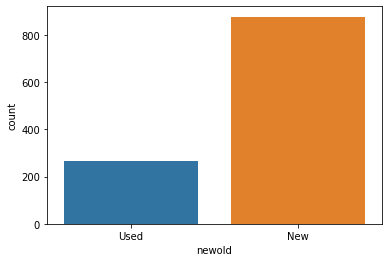

In [40]:
sns.countplot(df.newold)

As we can see, most of them are new.

In [22]:
# 2.2.2 stock
print(len(df.stock.unique()))
len(df.stock.unique()) == len(df)

383


False

<AxesSubplot:xlabel='stock', ylabel='Density'>

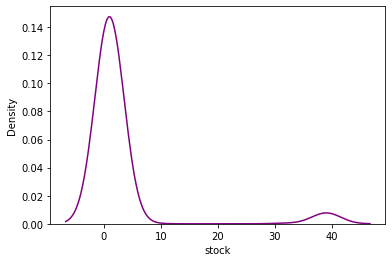

In [41]:
sns.kdeplot(df.stock.value_counts(), color = 'purple')

From above, we can see stock is not unique for each vehicle and moreover, some of stocks have most about 40 vehicles.

<AxesSubplot:xlabel='sleeps', ylabel='Count'>

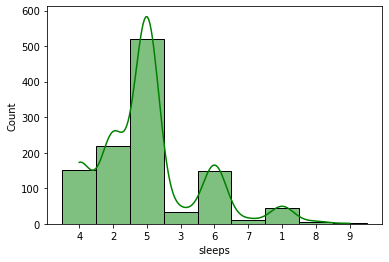

In [42]:
# 2.2.3 sleeps
sleeps = df.sleeps.dropna()
sns.histplot(sleeps, kde = True, color = 'green')

As can be observed, most of vehicles have 5 sleeps and vehicles have at most 9 sleeps.

In [37]:
# 2.2.4 length
# for this column, we only keep ft
length = df.length.str.split(' ').map(lambda x : x[0])
length.describe()

count     1142
unique      27
top         25
freq       547
Name: length, dtype: object

<AxesSubplot:xlabel='length', ylabel='Count'>

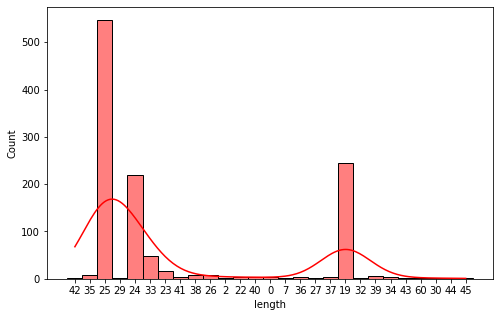

In [45]:
fig = plt.figure(figsize = (8, 5))
sns.histplot(length, kde = True, color = 'red')

25, 19 and 24 are more common in length, and only 27 unique values.

In [46]:
# 2.2.5 price
df.price.describe()

count      1142.000000
mean     146979.294221
std       28128.751963
min       50999.000000
25%      141592.500000
50%      158457.000000
75%      159995.000000
max      341999.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

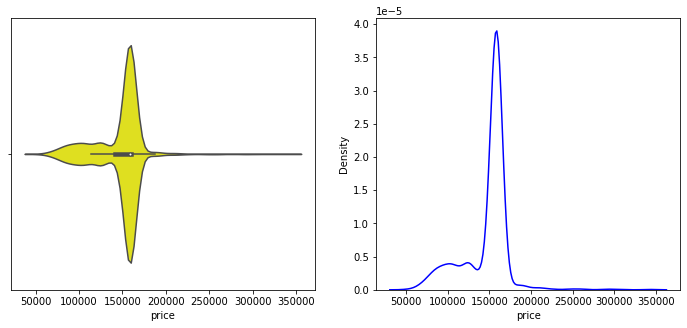

In [51]:
_, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.violinplot(df.price, color = 'yellow', ax = ax[0])
sns.kdeplot(df.price, color = 'blue', ax = ax[1])

As we can see, most of prices are centering around 150000, but price is like gaussian but with very low variance.

In [53]:
# 2.2.6 location
location = df.location.str.replace(' {2,}', ' ') # regular expression
location.value_counts()
# most of them are from Vacaville, CA

Vacaville, CA                                       157
Katy, TX                                            126
Fresno, CA                                           82
Las Vegas, NV                                        82
Colton, CA                                           81
                                                   ... 
Forest Lake, MN                                       1
RVs.com Showroom Wheat Ridge -\n Wheat Ridge, CO      1
Huber Heights, OH                                     1
Hope Mills, NC                                        1
Pocatello, ID                                         1
Name: location, Length: 133, dtype: int64

In [54]:
# 2.2.7 horsepower
# we know that horsepower are most in NaN, we drop them first
hp = df.horsepower.dropna()
hp.unique()

array([188., 360., 330., 350., 450., 300., 340., 380.])

<AxesSubplot:xlabel='horsepower', ylabel='count'>

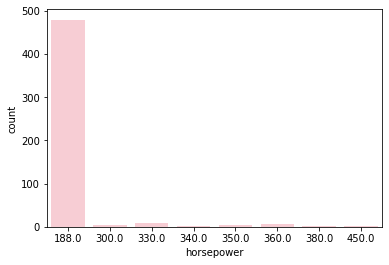

In [59]:
sns.countplot(hp, color = 'pink', alpha = 0.9)
# most of them are 188, largest one is 450

<AxesSubplot:xlabel='newold', ylabel='price'>

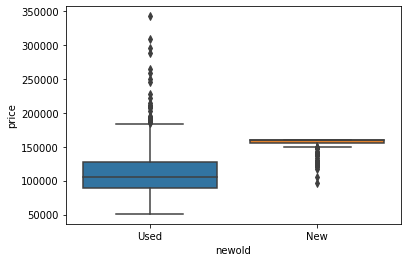

In [60]:
# 2.2.8 newold v.s. price
sns.boxplot(df.newold, df.price)

As we can see new ones are more expensive than second-hand ones.

   length          price
0     0.0  113165.666667
1    19.0  138999.000000
2    19.0  159870.949239
3    19.0  130045.978261
4     2.0   88999.000000
corr is : 0.5012139166696623


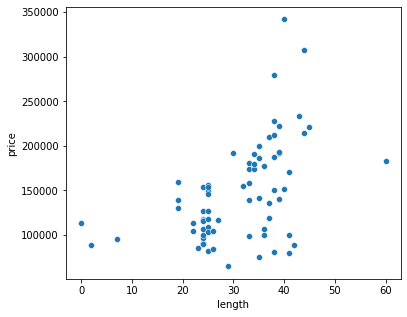

In [76]:
# 2.2.8 price v.s. length v.s. newold
fig = plt.figure(figsize = (6, 5))
sub = df.groupby('length').agg({'price': np.mean}).reset_index()
sub.length = sub.length.str.split(' ').map(lambda x : x[0]).map(float)
print(sub.head())
sns.scatterplot(sub.length, sub.price)
print('corr is :', sub.corr().values[0][1])

On average, when length is larger price is higher. But pearson correlation is only 0.5012139166696623.

<AxesSubplot:xlabel='newold', ylabel='price'>

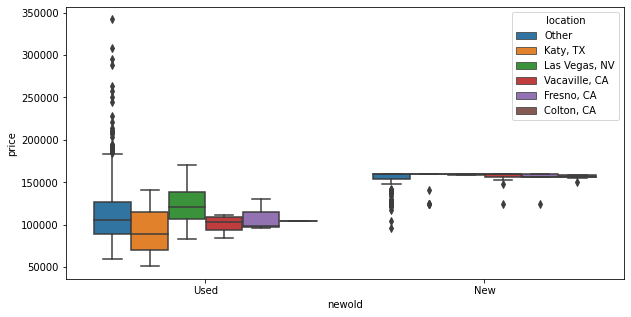

In [92]:
# 2.2.8 location v.s. price v.s. newold
thres = 100
x = df.location.value_counts()
m = df.location.isin(x.index[ x < 50])
df2 = df.copy()
df2.loc[m, 'location'] = 'Other'
fig = plt.figure(figsize = (10, 5))
sns.boxplot(df2.newold, df2.price, hue = df2.location,)

As can be seen, some areas are more expensive than other areas, but overall, as we mentioned before, new ones are more expensive.